---
# Approximation of $\pi$
---
In this notebook, we explore some computational method used to approximate $\pi$. 

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from celluloid import Camera 
from IPython.display import HTML


In [2]:
# source: http://www.math.com/tables/constants/pi.htm
PI_STRING = "3.1415926535897932384626433832795028841971693993751058209749445923078164062862089986280348253421170679821480865132823066470938446095505822317253594081284811174502841027019385211055596446229489549303819644288109756659334461284756482337867831652712019091456485669234603486104543266482133936072602491412737245870066063155881748815209209628292540917153643678925903600113305305488204665213841469519415116094330572703657595919530921861173819326117931051185480744623799627495673518857527248912279381830119491298336733624406566430860213949463952247371907021798609437027705392171762931767523846748184676694051320005681271452635608277857713427577896091736371787214684409012249534301465495853710507922796892589235420199561121290219608640344181598136297747713099605187072113499999983729780499510597317328160963185950244594553469083026425223082533446850352619311881710100031378387528865875332083814206171776691473035982534904287554687311595628638823537875937519577818577805321712268066130019278766111959092164201989"

## Monte Carlo approximation using the area of a unit circle quadrant
See: 

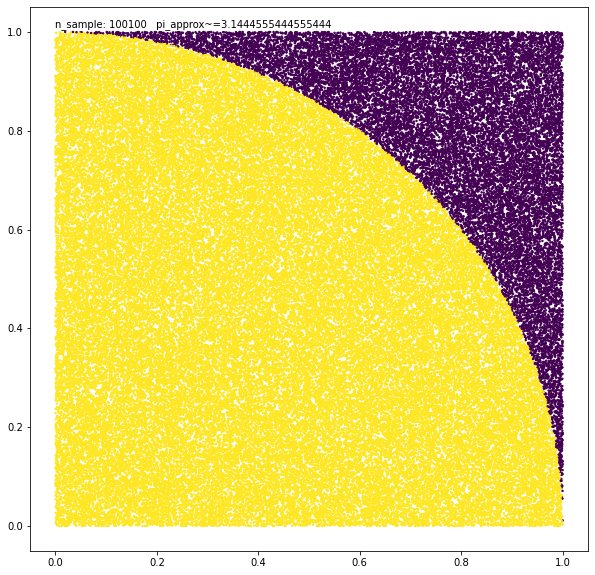

In [14]:
fig, ax = plt.subplots(1, 1, figsize=(10, 10)) # creating my fig
camera = Camera(fig)

for i in range(6):
    n = 100 + 10 ** i
    rand_x = np.random.rand(n)
    rand_y = np.random.rand(n)
    
    ax.scatter(rand_x, rand_y, c=(rand_x**2 + rand_y**2 < 1), s=2) 
    ax.text(0, 1.01, f"n_sample: {n}   pi_approx~={4 * np.sum(rand_x**2 + rand_y**2 < 1) / n}")
    camera.snap() 
animation = camera.animate() # animation ready
HTML(animation.to_html5_video()) # displaying the animation


In [17]:
def monte_carlo_pi_approx_slow(n): 
    num_inside = 0
    for i in range(n):
        rand_x, rand_y = np.random.rand(2)
        if rand_x**2 + rand_y**2 < 1:
            num_inside += 1
    pi = 4 * (num_inside / n)
    return pi

def monte_carlo_pi_approx_fast(n):
    rand_x = np.random.rand(n)
    rand_y = np.random.rand(n)
    return 4 * np.sum(rand_x**2 + rand_y**2 < 1) / n

%time print(monte_carlo_pi_approx(10000))
%time print(monte_carlo_numpy_pi_approx(10000))

3.1624
CPU times: user 43.5 ms, sys: 16.1 ms, total: 59.6 ms
Wall time: 44.5 ms
3.1644
CPU times: user 627 µs, sys: 0 ns, total: 627 µs
Wall time: 515 µs


---
# Series approximataion to $\pi$
---
Ramanujan's formula: 
$$
\frac{1}{\pi} = 12 \sum_{k = 0}^\infty \frac{(-1)^k (6k)!(135914009 + 545140134k)}{(3k)!(k!)^3 640320^{3k + 3/2}}
$$
source: https://en.wikipedia.org/wiki/Approximations_of_%CF%80

Newton's formula (based on generalised binomial theorem): 
$$
\frac{\pi}{12} + \frac{\sqrt{3}}{8} = \sum_{k = 0}^\infty (-1)^k \frac{(1/2)(1/2 - 1)\dots(1/2 -k + 1)}{k! (2k + 1)2^{2k+1}}
$$

In [24]:
factorial_memo = {0: 1, 1: 1}
def factorial(n):
    if n in factorial_memo:
        return factorial_memo[n]
    else:
        result = n * factorial(n - 1)
        factorial_memo[n] = result
        return result

def falling_factorial(init_num, num_terms):
    if num_terms == 0:
        return 1
    return np.product([init_num - i for i in range(num_terms)])

def generalised_binomial(r, n):
    return falling_factorial(r, n) / factorial(n)
    
def num_match(approx_string):
    for i in range(len(PI_STRING)):
        if approx_string[i] != PI_STRING[i]:
            return i
    return len(PI_STRING)
    
def ramanujan_sum(n):
    acc = 0
    for k in range(n):
        numerator = (-1)**(k % 2) * factorial(6 * k) * (13591409 + 545140134 * k)
        denominator = factorial(3 * k) * factorial(k)**3 * 640320**(3 * k + 3/2)
        acc += numerator / denominator
    pi = 1 / (12 * acc)
    return pi

def newton_sum(n):
    acc = 0
    for k in range(n):
        a = 2 * k + 1
        term = generalised_binomial(1/2, k) / (a * 2**a)
        acc += (-1)**(k %2) * term
    pi = 12 * (acc - np.sqrt(3) / 8)
    return pi

print("Ramanujan's formula:")
for k in range(1, 5):
    pi_approx =  ramanujan_sum(k)
    print(f"With {k} terms, we get pi ~= {pi_approx}. Correct decimal place: {num_match(str(pi_approx)) - 2}")

print("\n\nNewton's formula:")
for k in range(1, 25):
    pi_approx =  newton_sum(k)
    print(f"With {k} terms, we get pi ~= {pi_approx}. Correct decimal place: {num_match(str(pi_approx)) - 2}")

Ramanujan's formula:
With 1 terms, we get pi ~= 3.1415926535897345. Correct decimal place: 13
With 2 terms, we get pi ~= 3.1415926535897936. Correct decimal place: 15
With 3 terms, we get pi ~= 3.1415926535897936. Correct decimal place: 15
With 4 terms, we get pi ~= 3.1415926535897936. Correct decimal place: 15


Newton's formula:
With 1 terms, we get pi ~= 3.401923788646684. Correct decimal place: 0
With 2 terms, we get pi ~= 3.1519237886466844. Correct decimal place: 1
With 3 terms, we get pi ~= 3.1425487886466845. Correct decimal place: 2
With 4 terms, we get pi ~= 3.1417117350752557. Correct decimal place: 3
With 5 terms, we get pi ~= 3.1416100098148396. Correct decimal place: 3
With 6 terms, we get pi ~= 3.1415954446070984. Correct decimal place: 5
With 7 terms, we get pi ~= 3.14159313378087. Correct decimal place: 5
With 8 terms, we get pi ~= 3.141592740390214. Correct decimal place: 6
With 9 terms, we get pi ~= 3.141592669883617. Correct decimal place: 7
With 10 terms, we get pi